In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *

In [129]:
url = 'C:/Users/felip/Downloads/DataSet/churndata.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Info
<p><b>Context</b></p><p>
<b>A fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.</b>
<b>Variables</b></p>
<p>
<b>CustomerID:</b> A unique ID that identifies each customer.
</p><p>
<b>Gender:</b> The customer’s gender: Male, Female
</p><p>
<b>Senior Citizen:</b> Indicates if the customer is 65 or older: Yes, No
</p><p>
<b>Partner:</b> Indicate if the customer has a partner: Yes, No
</p><p>
<b>Dependents:</b> Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
</p><p>
<b>Tenure:</b> Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
</p><p>
<b>Phone Service:</b> Indicates if the customer subscribes to home phone service with the company: Yes, No
</p><p>
<b>Multiple Lines:</b> Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
</p><p>
<b>Internet Service:</b> Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
</p><p>
<b>Online Security:</b> Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
</p><p>
<b>Online Backup:</b> Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
</p><p>
<b>Device Protection:</b> Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
</p><p>
<b>Tech Support:</b> Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
</p><p>
<b>Streaming TV:</b> Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
</p><p>
<b>Streaming Movies:</b> Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
</p><p>
<b>Contract:</b> Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
</p><p>
<b>Paperless Billing:</b> Indicates if the customer has chosen paperless billing: Yes, No
</p><p>
<b>Payment Method:</b> Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
</p><p>
<b>Monthly Charge:</b> Indicates the customer’s current total monthly charge for all their services from the company.
</p><p>
<b>Total Charges:</b> Indicates the customer’s total charges, calculated to the end of the quarter specified above.
</p><p>
<b>Churn Label:</b> Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
</p>

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# goal
<p> With this Dataset we will be able to do a churn analysis, churn is one of the most requested types of analysis for data scientists, it aims to analyze the reasons why a person leaves or not a certain company or abandons a service, we will work on this dataset, in search of discovering the main reasons for the departure of customers from our fictitious company, cleaning the data and performing our proper analyses.</p>

# Cleaning Data
<p> In our cleanup process, we look at our useful and not useful variables for our analysis</p>

In [131]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


<p> We can see that all variables have their certain importance, but the customerID variable does not bring us any relevant information, and each customer is unique in our dataset. </p>

In [132]:
clients = df.duplicated(subset='customerID').sum()
print(f'number of unique customers: {clients}')
df_new = df.drop('customerID',axis=1) # eliminating customerID

number of unique customers: 0


## We can now separate our categorical variables and numeric variables


In [133]:
list_cat = []
list_num = []
for i in df_new.columns.tolist():
    if df_new[i].dtypes == 'O':
        list_cat.append(i)
    else:
        list_num.append(i)

In [134]:
list_cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [135]:
list_num

['SeniorCitizen', 'tenure', 'MonthlyCharges']

<p> With our separation we could see clear errors, such as TotalCharges classified as a categorical variable, and SeniorCitizen classified as a numerical variable </p>
<p>Senior Citizen: Indicates if the customer is 65 or older: Yes, No</p>
<p>Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.</p>

In [136]:
# we can see that there are several lines of our data there are blank data, we will eliminate all of them
df_new['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
           ..
2275.1      1
389.25      1
1686.85     1
863.1       1
272.95      1
Name: TotalCharges, Length: 6531, dtype: int64

In [137]:
# our seniorcitizen data is probably correct, just categorized wrong.
df_new['SeniorCitizen'].unique()
df_new.loc[df_new['SeniorCitizen']==0,'SeniorCitizen'] = 'No'
df_new.loc[df_new['SeniorCitizen']==1,'SeniorCitizen'] = 'Yes'

In [138]:
# eliminating our blank data
df_new = df_new[~df_new['TotalCharges'].str.contains(' ')]
# floating our data
df_new['TotalCharges'] = df_new.loc[:,'TotalCharges'].astype('float')

In [139]:
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## reviewing our data


In [140]:
list_cat = []
list_num = []
for i in df_new.columns.tolist():
    if df_new[i].dtypes == 'O':
        list_cat.append(i)
    else:
        list_num.append(i)

In [141]:
list_cat.pop()
list_cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [142]:
list_num

['tenure', 'MonthlyCharges', 'TotalCharges']

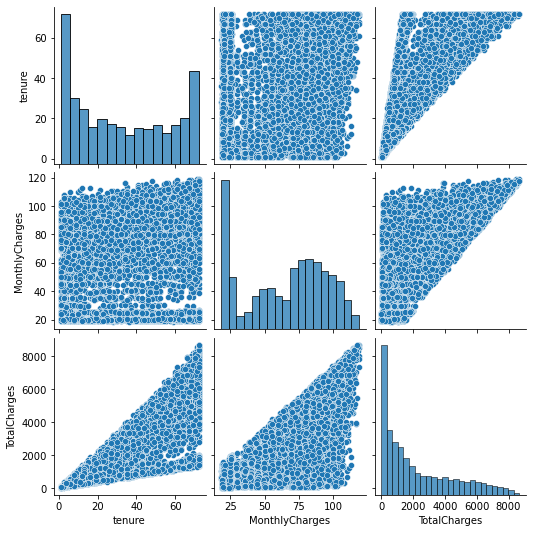

In [154]:
# seeing the distribution of our data
sns.pairplot(df_new)

<p> We can continue this data, making a more refined analysis on top of your variables, and creating models to predict churn </p>

gender


<AxesSubplot:xlabel='gender', ylabel='count'>

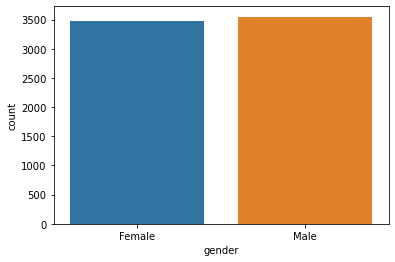

SeniorCitizen


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

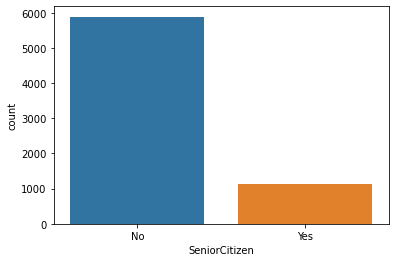

Partner


<AxesSubplot:xlabel='Partner', ylabel='count'>

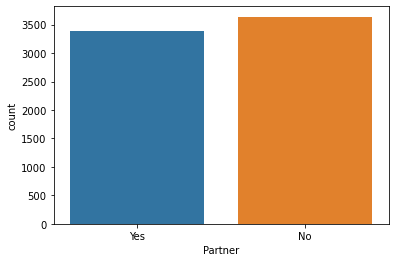

Dependents


<AxesSubplot:xlabel='Dependents', ylabel='count'>

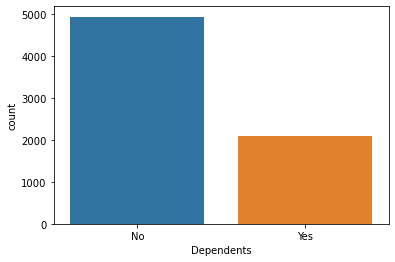

PhoneService


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

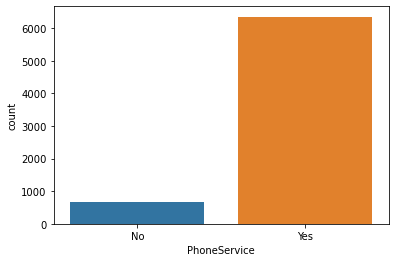

MultipleLines


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

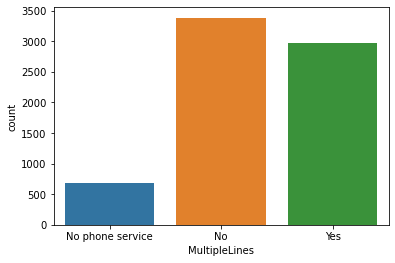

InternetService


<AxesSubplot:xlabel='InternetService', ylabel='count'>

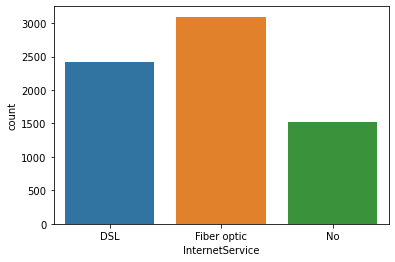

OnlineSecurity


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

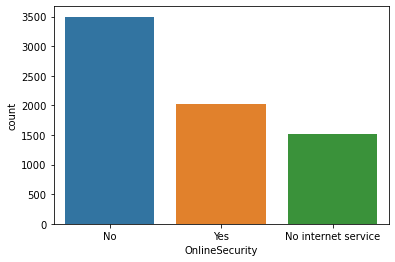

OnlineBackup


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

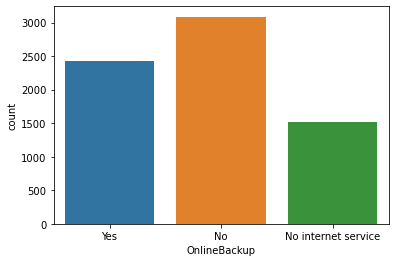

DeviceProtection


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

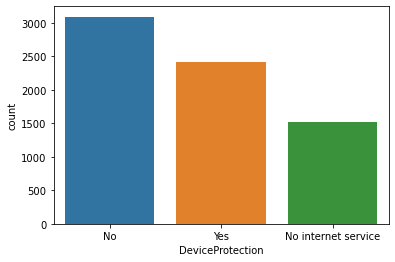

TechSupport


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

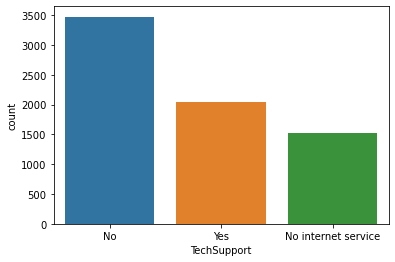

StreamingTV


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

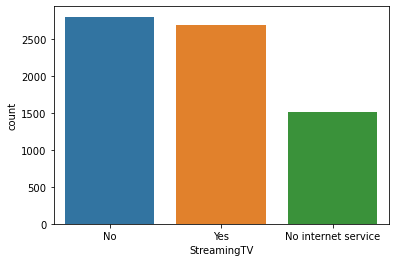

StreamingMovies


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

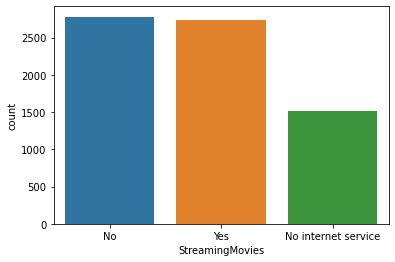

Contract


<AxesSubplot:xlabel='Contract', ylabel='count'>

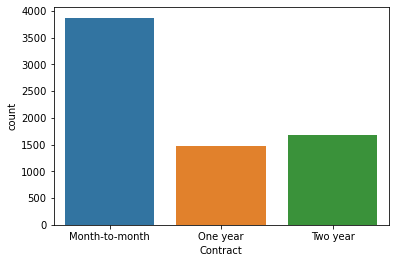

PaperlessBilling


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

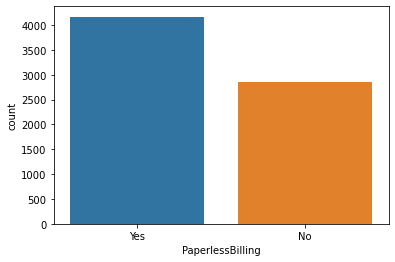

PaymentMethod


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

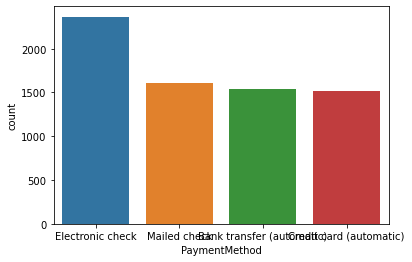

In [155]:
for i in list_cat:
    print(i)
    display(sns.countplot(x=i,data=df_new))
    plt.show()

In [179]:
data_to_ml = pd.get_dummies(df_new,columns=['PaymentMethod'])

In [180]:
# feature engineering, creating dummies, and normalize
automl = setup(data=data_to_ml, target = 'Churn',normalize=True, normalize_method = 'minmax')

,Description,Value
0,session_id,3674
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7032, 23)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [181]:
modelos_py = compare_models(n_select=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8029,0.8467,0.5264,0.6647,0.5863,0.4594,0.4656,0.1410
lightgbm,Light Gradient Boosting Machine,0.7985,0.8352,0.5317,0.6501,0.5837,0.4526,0.4575,0.7350
lr,Logistic Regression,0.7974,0.8418,0.5325,0.6458,0.5826,0.4507,0.4550,4.1150
ridge,Ridge Classifier,0.7958,0.0000,0.5034,0.6523,0.5674,0.4367,0.4436,0.0840
ada,Ada Boost Classifier,0.7956,0.8436,0.5225,0.6444,0.5761,0.4435,0.4484,0.0560
lda,Linear Discriminant Analysis,0.7944,0.8352,0.5439,0.6337,0.5845,0.4491,0.4520,0.5940
xgboost,Extreme Gradient Boosting,0.7895,0.8247,0.5226,0.6252,0.5686,0.4311,0.4345,4.1990
svm,SVM - Linear Kernel,0.7875,0.0000,0.4790,0.6462,0.5316,0.4035,0.4191,0.0370
rf,Random Forest Classifier,0.7869,0.8219,0.4752,0.6328,0.5420,0.4070,0.4145,0.1130
et,Extra Trees Classifier,0.7680,0.7883,0.4553,0.5821,0.5101,0.3613,0.3664,0.1090


In [183]:
model_f = modelos_py[0]

In [194]:
# seeing the most important variables
model_f.feature_importances_

array([1.44077872e-01, 8.17755000e-02, 1.01045631e-01, 1.58066660e-03,
       1.73544374e-03, 2.85896893e-02, 1.72839091e-03, 6.50733064e-04,
       6.62082894e-03, 2.03873879e-04, 7.04595869e-03, 9.97193603e-04,
       9.87467885e-03, 1.28592614e-03, 2.37226685e-03, 7.64831163e-02,
       6.17295080e-02, 5.95615174e-05, 7.66400333e-03, 0.00000000e+00,
       4.87772925e-04, 1.37021377e-03, 4.94954272e-02, 2.90871907e-04,
       2.15822750e-04, 3.69756804e-03, 0.00000000e+00, 5.43982922e-03,
       3.66741669e-01, 4.94854433e-03, 6.65444975e-03, 2.51369884e-02])

In [9]:
tunado = tune_model(modelos_py[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8073,0.8548,0.5923,0.6471,0.6185,0.4899,0.4908
1,0.8114,0.8455,0.5692,0.6667,0.6141,0.4903,0.4930
2,0.8028,0.8628,0.5769,0.6410,0.6073,0.4762,0.4773
3,0.8354,0.8741,0.5846,0.7379,0.6524,0.5464,0.5527
4,0.8110,0.8672,0.5231,0.6869,0.5939,0.4736,0.4811
5,0.7967,0.8227,0.5000,0.6500,0.5652,0.4355,0.4419
6,0.8191,0.8655,0.5385,0.7071,0.6114,0.4963,0.5041
7,0.8110,0.8498,0.5000,0.6989,0.5830,0.4651,0.4760
8,0.7866,0.8176,0.4923,0.6214,0.5494,0.4120,0.4168
9,0.7805,0.8151,0.5077,0.6000,0.5500,0.4062,0.4086


<p> It is still possible to perform hundreds of actions with these data sets, make predictions, more far-fetched analyses, this set is really good for all data scientists who want to learn more about churn, data cleaning, and use of feature engineering. </p>